In [2]:
# 引入代码模块和配置工作环境
import os
import numpy as np
import pandas as pd
# 导入数据
train_data = pd.read_csv("car_train.csv", sep = " ")
test_data = pd.read_csv("car_test.csv", sep = " ")
# 简单观察数据
print('Train data shape:',train_data.shape)
print('TestA data shape:',test_data.shape)
train_data.head()

Train data shape: (150000, 31)
TestA data shape: (50000, 30)


,SaleID,name,regDate,model,brand,bodyType,fuelType,gearbox,power,kilometer,...,v_5,v_6,v_7,v_8,v_9,v_10,v_11,v_12,v_13,v_14
0,0,736,20040402,30.0,6,1.0,0.0,0.0,60,12.5,...,0.235676,0.101988,0.129549,0.022816,0.097462,-2.881803,2.804097,-2.420821,0.795292,0.914762
1,1,2262,20030301,40.0,1,2.0,0.0,0.0,0,15.0,...,0.264777,0.121004,0.135731,0.026597,0.020582,-4.900482,2.096338,-1.030483,-1.722674,0.245522
2,2,14874,20040403,115.0,15,1.0,0.0,0.0,163,12.5,...,0.251410,0.114912,0.165147,0.062173,0.027075,-4.846749,1.803559,1.565330,-0.832687,-0.229963
3,3,71865,19960908,109.0,10,0.0,0.0,1.0,193,15.0,...,0.274293,0.110300,0.121964,0.033395,0.000000,-4.509599,1.285940,-0.501868,-2.438353,-0.478699
4,4,111080,20120103,110.0,5,1.0,0.0,0.0,68,5.0,...,0.228036,0.073205,0.091880,0.078819,0.121534,-1.896240,0.910783,0.931110,2.834518,1.923482


In [71]:
test_data.head()

,SaleID,name,regDate,model,brand,bodyType,fuelType,gearbox,power,kilometer,...,v_6,v_7,v_8,v_9,v_10,v_11,v_12,v_13,v_14,train
16303,216303,176935,20100404,22.0,9,1.0,0.0,0.0,75,3.0,...,0.000732,0.099810,0.093028,0.101092,2.683100,-1.333457,1.422988,2.194814,1.385797,0
28977,228977,102834,20050910,16.0,13,1.0,0.0,0.0,60,6.0,...,0.000574,0.074586,0.079008,0.100067,3.064324,-0.915006,0.015846,2.099687,0.935185,0
20302,220302,79728,19960412,16.0,13,1.0,0.0,0.0,55,6.0,...,0.000089,0.094454,0.045174,0.104727,3.684799,-0.235319,-2.260906,1.221499,0.229609,0
32624,232624,569,20031107,4.0,4,0.0,1.0,NaN,0,15.0,...,0.087864,0.120900,0.038396,0.037909,-3.000282,0.727151,-0.562957,-1.296051,-0.076710,0
37270,237270,27608,20071108,63.0,0,3.0,0.0,1.0,140,8.0,...,0.116798,0.065877,0.072827,0.059858,-5.595943,0.591809,1.687902,0.407523,-0.287983,0


In [ ]:
# 导入代码模型和配置工作环境
import matplotlib.pyplot as plt
import seaborn as sns
import missingno as msno
import scipy.stats as st
import warnings
#导入warnings包，利用过滤器来实现忽略警告语句
warnings.filterwarnings('ignore')

In [8]:
#缺失值处理
# 变量 notRepairedDamage
train_data['notRepairedDamage'].value_counts()
train_data['notRepairedDamage'].replace('-', np.nan, inplace=True)
test_data['notRepairedDamage'].replace('-', np.nan, inplace=True)

,train_data,test_data
SaleID,0.0,0.0
name,0.0,0.0
regDate,0.0,0.0
model,1.0,0.0
brand,0.0,0.0
bodyType,4506.0,1504.0
fuelType,8680.0,2924.0
gearbox,5981.0,1968.0
power,0.0,0.0
kilometer,0.0,0.0


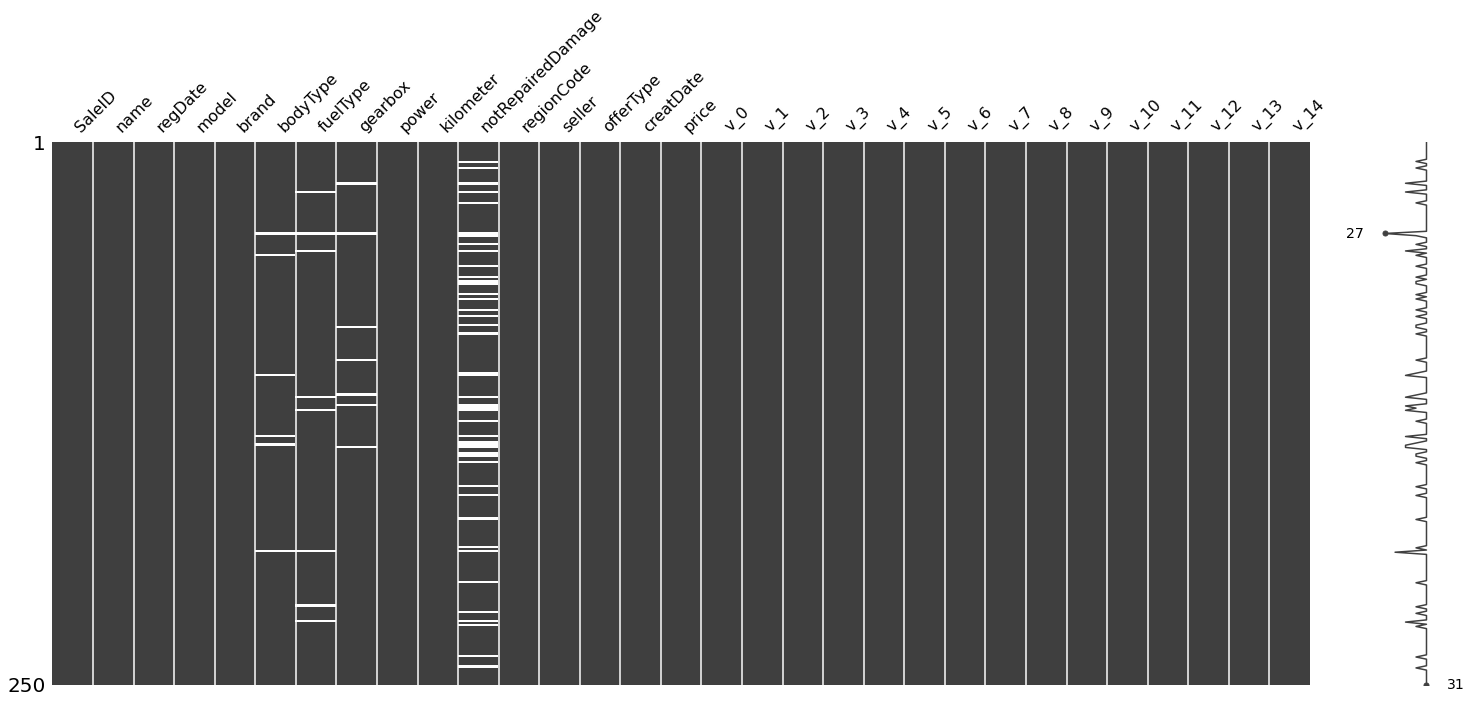

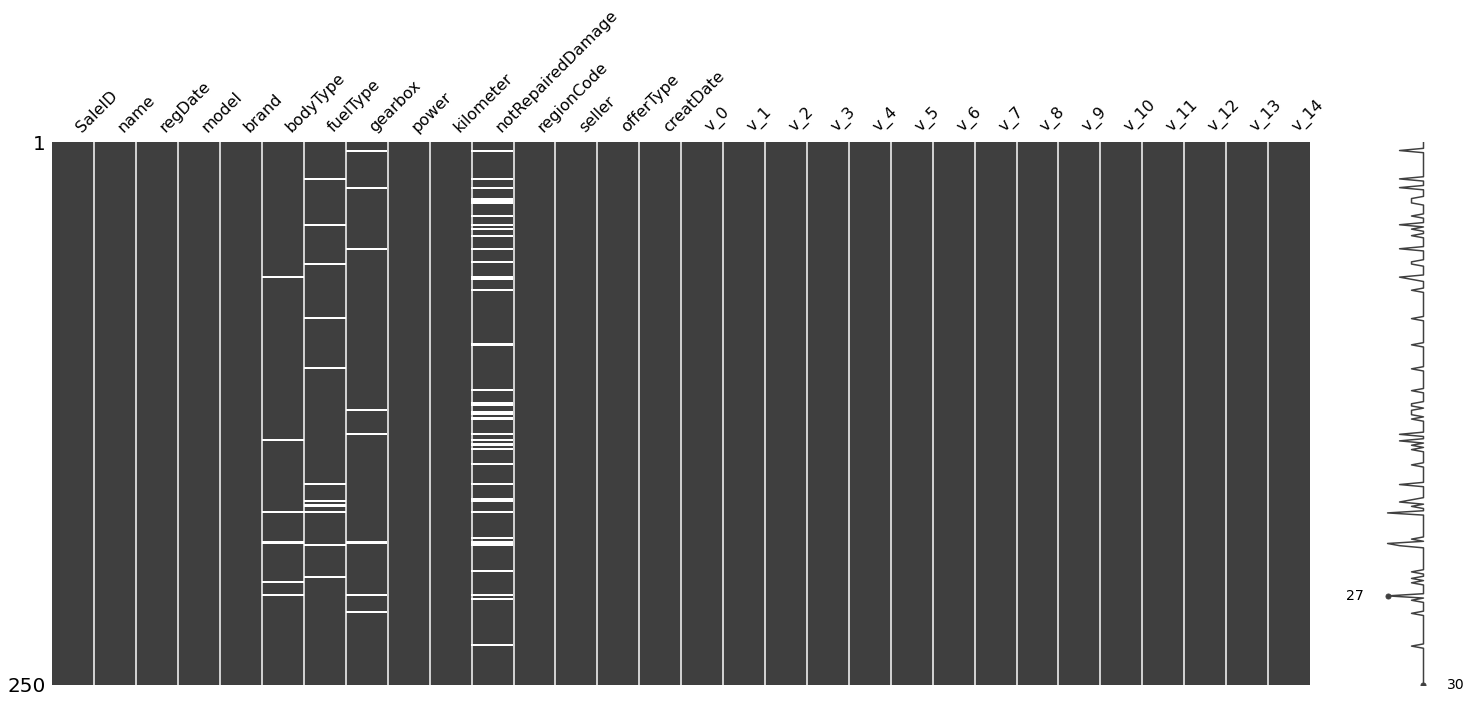

In [9]:
# 可视化看下缺省值
# 此处仅展示前16个变量的缺失情况，v1-v14变量均无缺失值
msno.matrix(train_data.sample(250))
msno.matrix(test_data.sample(250))
# 统计缺失值
df = pd.DataFrame([train_data.isnull().sum(), test_data.isnull().sum()]).T
df.columns = ['train_data','test_data']
df[:16]

In [ ]:
#异常值处理

In [10]:
print("seller: ", train_data["seller"].value_counts())
print("offerType:", train_data["offerType"].value_counts())
del train_data["seller"]
del train_data["offerType"]
del test_data["seller"]
del test_data["offerType"]


seller:  0    149999
1         1
Name: seller, dtype: int64
offerType: 0    150000
Name: offerType, dtype: int64


Delete number is: 963
Now column number is: 149037
Description of data less than the lower bound is:
count    0.0
mean     NaN
std      NaN
min      NaN
25%      NaN
50%      NaN
75%      NaN
max      NaN
Name: power, dtype: float64
Description of data larger than the upper bound is:
count      963.000000
mean       846.836968
std       1929.418081
min        376.000000
25%        400.000000
50%        436.000000
75%        514.000000
max      19312.000000
Name: power, dtype: float64


,SaleID,name,regDate,model,brand,bodyType,fuelType,gearbox,power,kilometer,...,v_5,v_6,v_7,v_8,v_9,v_10,v_11,v_12,v_13,v_14
0,0,736,20040402,30.0,6,1.0,0.0,0.0,60,12.5,...,0.235676,0.101988,0.129549,0.022816,0.097462,-2.881803,2.804097,-2.420821,0.795292,0.914762
1,1,2262,20030301,40.0,1,2.0,0.0,0.0,0,15.0,...,0.264777,0.121004,0.135731,0.026597,0.020582,-4.900482,2.096338,-1.030483,-1.722674,0.245522
2,2,14874,20040403,115.0,15,1.0,0.0,0.0,163,12.5,...,0.251410,0.114912,0.165147,0.062173,0.027075,-4.846749,1.803559,1.565330,-0.832687,-0.229963
3,3,71865,19960908,109.0,10,0.0,0.0,1.0,193,15.0,...,0.274293,0.110300,0.121964,0.033395,0.000000,-4.509599,1.285940,-0.501868,-2.438353,-0.478699
4,4,111080,20120103,110.0,5,1.0,0.0,0.0,68,5.0,...,0.228036,0.073205,0.091880,0.078819,0.121534,-1.896240,0.910783,0.931110,2.834518,1.923482
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
149032,149995,163978,20000607,121.0,10,4.0,0.0,1.0,163,15.0,...,0.280264,0.000310,0.048441,0.071158,0.019174,1.988114,-2.983973,0.589167,-1.304370,-0.302592
149033,149996,184535,20091102,116.0,11,0.0,0.0,0.0,125,10.0,...,0.253217,0.000777,0.084079,0.099681,0.079371,1.839166,-2.774615,2.553994,0.924196,-0.272160
149034,149997,147587,20101003,60.0,11,1.0,1.0,0.0,90,6.0,...,0.233353,0.000705,0.118872,0.100118,0.097914,2.439812,-1.630677,2.290197,1.891922,0.414931
149035,149998,45907,20060312,34.0,10,3.0,1.0,0.0,156,15.0,...,0.256369,0.000252,0.081479,0.083558,0.081498,2.075380,-2.633719,1.414937,0.431981,-1.659014


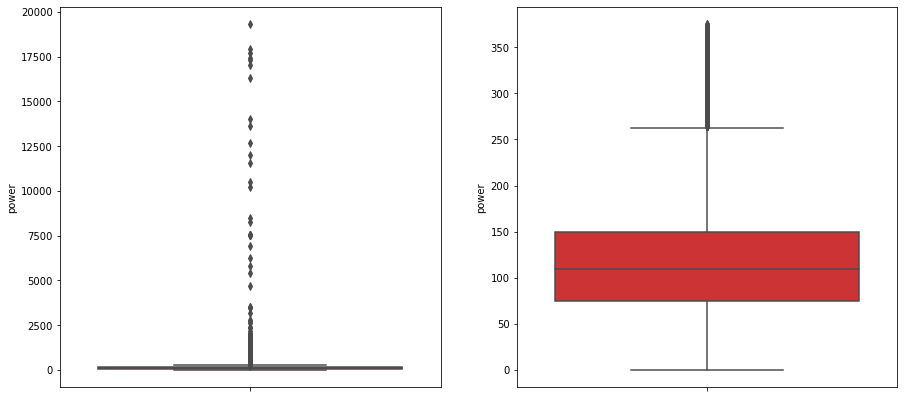

In [11]:
def outliers_proc(data, col_name, scale=3):
    """
    用于清洗异常值，默认用 box_plot（scale=3）进行清洗
    :param data: 接收 pandas 数据格式
    :param col_name: pandas 列名
    :param scale: 尺度
    :return:
    """
    def box_plot_outliers(data_ser, box_scale):
        """
        利用箱线图去除异常值
        :param data_ser: 接收 pandas.Series 数据格式
        :param box_scale: 箱线图尺度，
        :return:
        """
        iqr = box_scale * (data_ser.quantile(0.75) - data_ser.quantile(0.25))
        val_low = data_ser.quantile(0.25) - iqr
        val_up = data_ser.quantile(0.75) + iqr
        rule_low = (data_ser < val_low)
        rule_up = (data_ser > val_up)
        return (rule_low, rule_up), (val_low, val_up)
    data_n = data.copy()
    data_series = data_n[col_name]
    rule, value = box_plot_outliers(data_series, box_scale=scale)
    index = np.arange(data_series.shape[0])[rule[0] | rule[1]]
    print("Delete number is: {}".format(len(index)))
    data_n = data_n.drop(index)
    data_n.reset_index(drop=True, inplace=True)
    print("Now column number is: {}".format(data_n.shape[0]))
    index_low = np.arange(data_series.shape[0])[rule[0]]
    outliers = data_series.iloc[index_low]
    print("Description of data less than the lower bound is:")
    print(pd.Series(outliers).describe())
    index_up = np.arange(data_series.shape[0])[rule[1]]
    outliers = data_series.iloc[index_up]
    print("Description of data larger than the upper bound is:")
    print(pd.Series(outliers).describe())
    fig, ax = plt.subplots(1, 2, figsize=(15, 7))
    sns.boxplot(y=data[col_name], data=data, palette="Set1", ax=ax[0])
    sns.boxplot(y=data_n[col_name], data=data_n, palette="Set1", ax=ax[1])
    return data_n
# 以变量 power 为例删除异常值，以查看上述函数效用
outliers_proc(train_data, 'power', scale=3)


<AxesSubplot:title={'center':'Correlation of Numeric Features with Price'}>

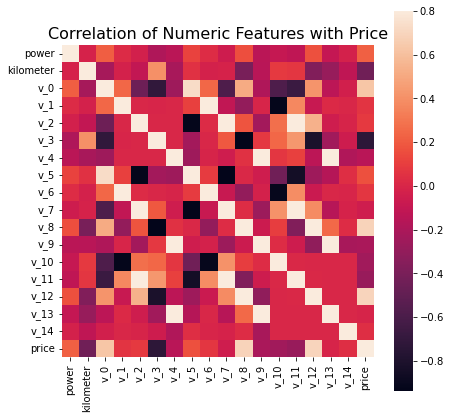

In [15]:
# 数字特征：power , kilometer , v0, v1, v2, v3, v4, v5, v6, v7, v8, v9, v10, v11, v12, v13, v14
numeric_features = ['power', 'kilometer', 'v_0', 'v_1', 'v_2', 'v_3', 'v_4', 'v_5', 'v_6',
'v_7', 'v_8', 'v_9', 'v_10', 'v_11', 'v_12', 'v_13','v_14' ]
# 类型特征：name , model , brand , bodyType , fuelType , gearbox , notRepairDamage , regionCode
categorical_features = ['name', 'model', 'brand', 'bodyType', 'fuelType', 'gearbox', 'notRepairedDamage',
'regionCode',]

numeric_features.append('price')
price_numeric = train_data[numeric_features]
correlation = price_numeric.corr()
f , ax = plt.subplots(figsize = (7, 7))
plt.title('Correlation of Numeric Features with Price',y=1,size=16)
sns.heatmap(correlation,square = True, vmax=0.8)


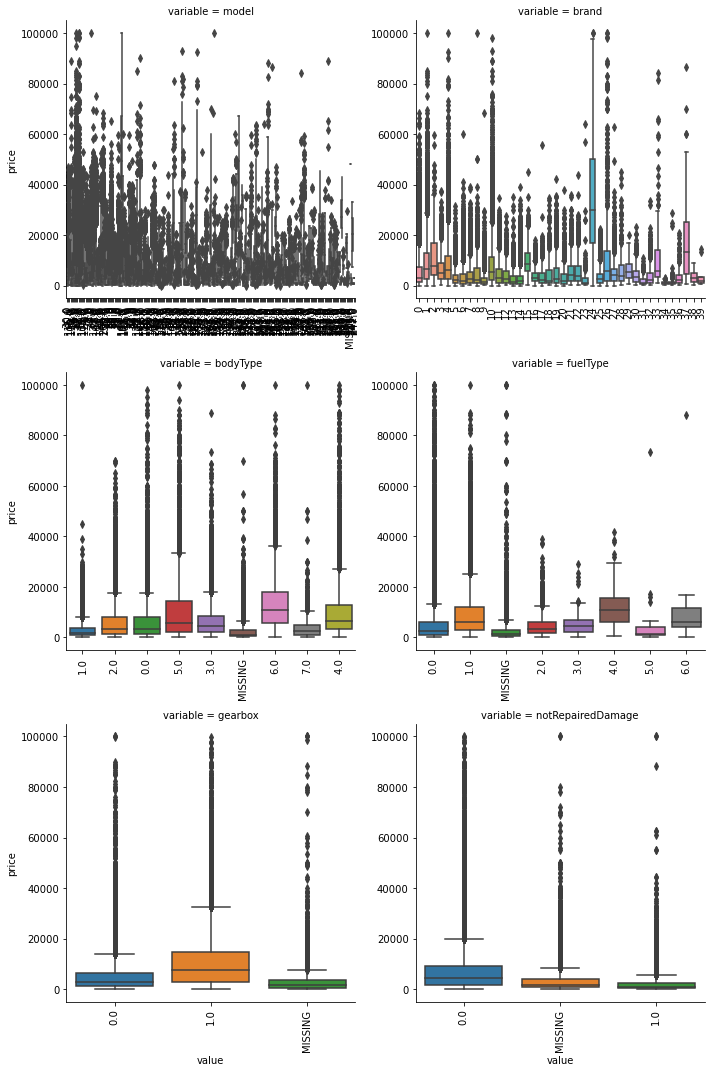

In [17]:
categorical_features = ["model", "brand","bodyType","fuelType","gearbox", "notRepairedDamage"]
for c in categorical_features:
    train_data[c] = train_data[c].astype('category')
    if train_data[c].isnull().any():
        train_data[c] = train_data[c].cat.add_categories(['MISSING'])
        train_data[c] = train_data[c].fillna('MISSING')
def boxplot(x, y, **kwargs):
    sns.boxplot(x=x, y=y)
    x=plt.xticks(rotation=90)
f = pd.melt(train_data, id_vars=['price'], value_vars=categorical_features)
g = sns.FacetGrid(f, col="variable", col_wrap=2, sharex=False, sharey=False, size=5)
g = g.map(boxplot, "value", "price")

In [19]:
# 训练集和测试集放在一起，方便构造特征
# 由于数据量过大，故从中按比例随机抽取 train 3000 条，test 1000 条
train_data = train_data.sample(n=3000, replace=True, random_state=100, axis=0)
test_data = test_data.sample(n=1000, replace=True, random_state=100, axis=0)
train_data['train']=1
test_data['train']=0
data = pd.concat([train_data, test_data], ignore_index=True, sort=False)
data['used_time'] = (pd.to_datetime(data['creatDate'], format='%Y%m%d', errors='coerce') -
    pd.to_datetime(data['regDate'], format='%Y%m%d', errors='coerce')).dt.days

In [72]:
class zerror:
    muffled = True #默认关闭抑制异常功能
    def calc(self, creatDate,regDate):
        try:
             data['used_time'] = (pd.to_datetime(data['creatDate'], format='%Y%m%d', errors='coerce') -
             pd.to_datetime(data['regDate'], format='%Y%m%d', errors='coerce')).dt.days
        except (ZeroDivisionError, ValueError, NameError):
                print('Your numbers were bogus')
         

In [20]:
data['city'] = data['regionCode'].apply(lambda x : str(x)[:-3])


In [21]:
train_gb = train_data.groupby("brand")
all_info = {}
for kind, kind_data in train_gb:
    info = {}
    kind_data = kind_data[kind_data['price'] > 0]
    info['brand_amount'] = len(kind_data)
    info['brand_price_max'] = kind_data.price.max()
    info['brand_price_median'] = kind_data.price.median()
    info['brand_price_min'] = kind_data.price.min()
    info['brand_price_sum'] = kind_data.price.sum()
    info['brand_price_std'] = kind_data.price.std()
    info['brand_price_average'] = round(kind_data.price.sum() / (len(kind_data) + 1), 2)
    all_info[kind] = info
brand_fe = pd.DataFrame(all_info).T.reset_index().rename(columns={"index": "brand"})
data = data.merge(brand_fe, how='left', on='brand')


In [22]:
bin = [i*10 for i in range(31)]
data['power_bin'] = pd.cut(data['power'], bin, labels=False)
# 删去原始数据，并保存数据用于树预测模型
data = data.drop(['creatDate', 'regDate', 'regionCode'], axis=1)
# 保存数据留作模型预测
data.to_csv('data_for_tree.csv', index=0)


In [23]:
from sklearn import preprocessing
# 对变量 power 做log变换后归一化
min_max_scaler = preprocessing.MinMaxScaler()
data['power'] = np.log(data['power'] + 1)
data['power'] = ((data['power'] - np.min(data['power'])) / (np.max(data['power']) - np.min(data['power'])))
# 对变量kilometer 直接进行归一化
data['kilometer'] = ((data['kilometer'] - np.min(data['kilometer'])) /(np.max(data['kilometer']) - np.min(data['kilometer'])))
# 对刚构造的销售统计量变量进行归一化
def max_min(x):
    return (x - np.min(x)) / (np.max(x) - np.min(x))
data['brand_amount'] = max_min(data['brand_amount'])
data['brand_price_average'] = max_min(data['brand_price_average'])
data['brand_price_max'] = max_min(data['brand_price_max'])
data['brand_price_median'] = max_min(data['brand_price_median'])
data['brand_price_min'] = max_min(data['brand_price_min'])
data['brand_price_std'] = max_min(data['brand_price_std'])
data['brand_price_sum'] = max_min(data['brand_price_sum'])


In [24]:
# 对类别特征进行 OneEncoder
data = pd.get_dummies(data, columns=['model', 'brand', 'bodyType', 'fuelType',
'gearbox', 'notRepairedDamage', 'power_bin'])
# 保存数据用于LR模型
data.to_csv('data_for_lr.csv', index=0)


In [25]:
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import learning_curve, validation_curve
from sklearn.metrics import mean_absolute_error, make_scorer
def reduce_mem_usage(df):
    """ iterate through all the columns of a dataframe and modify the data typ
        to reduce memory usage.
    """
    start_mem = df.memory_usage().sum()
    print('Memory usage of dataframe is {:.2f} MB'.format(start_mem))
    for col in df.columns:
        col_type = df[col].dtype
        if col_type != object:
            c_min = df[col].min()
            c_max = df[col].max()
            if str(col_type)[:3] == 'int':
                if c_min > np.iinfo(np.int8).min and c_max < np.iinfo(np.int8).max:
                    df[col] = df[col].astype(np.int8)
                elif c_min > np.iinfo(np.int16).min and c_max < np.iinfo(np.int16).max:
                    df[col] = df[col].astype(np.int16)
                elif c_min > np.iinfo(np.int32).min and c_max < np.iinfo(np.int32).max:
                    df[col] = df[col].astype(np.int32)
                elif c_min > np.iinfo(np.int64).min and c_max < np.iinfo(np.int64).max:
                    df[col] = df[col].astype(np.int64)
            else:
                if c_min > np.finfo(np.float16).min and c_max < np.finfo(np.float16).max:
                    df[col] = df[col].astype(np.float16)
                elif c_min > np.finfo(np.float32).min and c_max < np.finfo(np.float32).max:
                    df[col] = df[col].astype(np.float32)
                else:
                    df[col] = df[col].astype(np.float64)
        else:
            df[col] = df[col].astype('category')
    end_mem = df.memory_usage().sum()
    print('Memory usage after optimization is: {:.2f} MB'.format(end_mem))
    print('Decreased by {:.1f}%'.format(100 * (start_mem - end_mem) / start_mem))
    return df
# 导入数据
sample_feature = reduce_mem_usage(pd.read_csv('data_for_tree.csv'))
continuous_feature_names = [x for x in sample_feature.columns if x not in ['price','brand','model','brand']]


Memory usage of dataframe is 1184128.00 MB
Memory usage after optimization is: 312984.00 MB
Decreased by 73.6%


In [31]:
# 对数据类型进行处理以使用模型
sample_feature = sample_feature.dropna().replace('-', 0).reset_index(drop=True)
sample_feature['notRepairedDamage'].replace('MISSING', np.nan, inplace=True)
sample_feature['notRepairedDamage'] = sample_feature['notRepairedDamage'].astype(np.float32)
sample_feature['bodyType'].replace('MISSING', np.nan, inplace=True)
sample_feature['bodyType'] = sample_feature['notRepairedDamage'].astype(np.float32)
sample_feature['fuelType'].replace('MISSING', np.nan, inplace=True)
sample_feature['fuelType'] = sample_feature['notRepairedDamage'].astype(np.float32)
sample_feature['gearbox'].replace('MISSING', np.nan, inplace=True)
sample_feature['gearbox'] = sample_feature['notRepairedDamage'].astype(np.float32)
# sample_feature.info()
sample_feature = sample_feature.dropna()
# 划分因变量和自变量
train = sample_feature[continuous_feature_names + ['price']]
train_X = train[continuous_feature_names]
train_y = train['price']
# 对原始数据构建线性回归模型
model = LinearRegression(normalize=True)
model = model.fit(train_X, train_y)
# 查看各变量的权重以及截距
'intercept:'+ str(model.intercept_)
print(pd.DataFrame(sorted(dict(zip(continuous_feature_names, model.coef_)).items(), key=lambda x:x[1],
reverse=True)[:10]))


              0             1
0           v_6  3.656109e+06
1          v_12  8.659715e+05
2           v_3  4.949706e+05
3          v_11  3.905449e+05
4          v_10  2.499113e+05
5          v_13  1.841273e+05
6           v_1  1.101647e+05
7     power_bin  4.776703e+02
8          city  1.043006e+02
9  brand_amount  7.037237e+00


In [ ]:
#线性回归

intercept:-31.17364747684538
                 0         1
0             v_12  9.715700
1             v_11  6.252215
2              v_3  4.490747
3              v_1  4.082875
4             v_10  2.725448
5             v_13  2.077091
6              v_0  1.274570
7        power_bin  0.042807
8     brand_amount  0.000251
9  brand_price_std  0.000016
The predicted price seems normal after np.log transforming


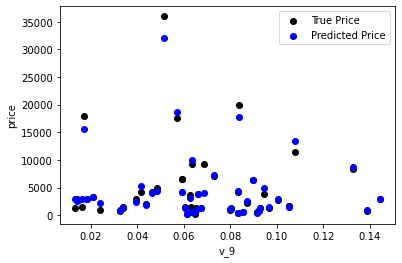

In [32]:
 #进行对数变换
train_y_ln = np.log(train_y + 1)
# 对变换后的数据进行拟合
model = model.fit(train_X, train_y_ln)
# 查看特征变量权重
print('intercept:'+ str(model.intercept_))
print(pd.DataFrame(sorted(dict(zip(continuous_feature_names, model.coef_)).items(), key=lambda x:x[1],
reverse=True)[:10]))
# 预测准确度可视化
plt.scatter(train_X['v_9'][subsample_index], train_y[subsample_index], color='black')
plt.scatter(train_X['v_9'][subsample_index], np.exp(model.predict(train_X.loc[subsample_index])),
color='blue')
plt.xlabel('v_9')
plt.ylabel('price')
plt.legend(['True Price','Predicted Price'],loc='upper right')
print('The predicted price seems normal after np.log transforming')
plt.show()


In [34]:
def log_transfer(func):
    def wrapper(y, yhat):
        result = func(np.log(y), np.nan_to_num(np.log(yhat)))
        return result
    return wrapper
# 对未对标签进行处理的数据进行交叉验证，得到每一折的模型评价得分(绝对误差均值)，以及得分均值AVG1
scores = cross_val_score(model, X = train_X, y = train_y, verbose = 1, cv = 5, scoring =
make_scorer(log_transfer(mean_absolute_error)))
print('AVG1:', np.mean(scores))
score_out1 = pd.DataFrame(scores.reshape(1,-1))
#score_out.columns = ['cv' + str(x) for x in range(1, 6)]
# 对已经对标签进行处理的数据进行交叉验证，得到每一折的模型评价得分(绝对误差均值)，以及得分均值AVG2
scores = cross_val_score(model, X = train_X, y = train_y_ln, verbose = 1, cv = 5, scoring =
make_scorer(mean_absolute_error))
print('AVG2:', np.mean(scores))
score_out2 = pd.DataFrame(scores.reshape(1,-1))
score_out = pd.concat([score_out1 , score_out2])
score_out.columns = ['cv' + str(x) for x in range(1, 6)]
score_out.index = ['MAE_raw','MAE_after log']
score_out


AVG1: 1.4459845944387983
AVG2: 0.2043919757865476


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   5 out of   5 | elapsed:    0.0s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   5 out of   5 | elapsed:    0.0s finished


,cv1,cv2,cv3,cv4,cv5
MAE_raw,1.380126,1.367661,1.390293,1.760098,1.331745
MAE_after log,0.220585,0.208769,0.201080,0.206191,0.185335


In [ ]:
#加入正则项的线性模型

In [37]:
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import Ridge
from sklearn.linear_model import Lasso
# 对比模型：简单线性模型、Lasso线性回归、岭回归
class modelresuslt:
    def __init__(self,models,datax,datay): # 初始化方法
        self.models = models 
        self.datax = datax
        self.datay = datay 
        
    def finalresult(self):
        result = dict()
        for model in self.models:
            model_name = str(model).split('(')[0]
            scores = cross_val_score(model, X=self.datax, y=self.datay, verbose=0, cv = 5,scoring=make_scorer(mean_absolute_error))
            result[model_name] = scores
        result = pd.DataFrame(result)
        result.index = ['cv' + str(x) for x in range(1, 6)]
        print(result)
r1 = modelresuslt([LinearRegression(),Ridge(),Lasso()],train_X,train_y_ln)
r1.finalresult()

,LinearRegression,Ridge,Lasso
cv1,0.220585,0.225422,0.380138
cv2,0.208769,0.207536,0.363332
cv3,0.201080,0.195053,0.361313
cv4,0.206191,0.208456,0.361268
cv5,0.185335,0.183327,0.362377


     LinearRegression     Ridge     Lasso
cv1          0.220585  0.225422  0.380138
cv2          0.208769  0.207536  0.363332
cv3          0.201080  0.195053  0.361313
cv4          0.206191  0.208456  0.361268
cv5          0.185335  0.183327  0.362377


intercept:-31.173641964938888
intercept:1.2090816124770578
intercept:8.566334723540981


<AxesSubplot:>

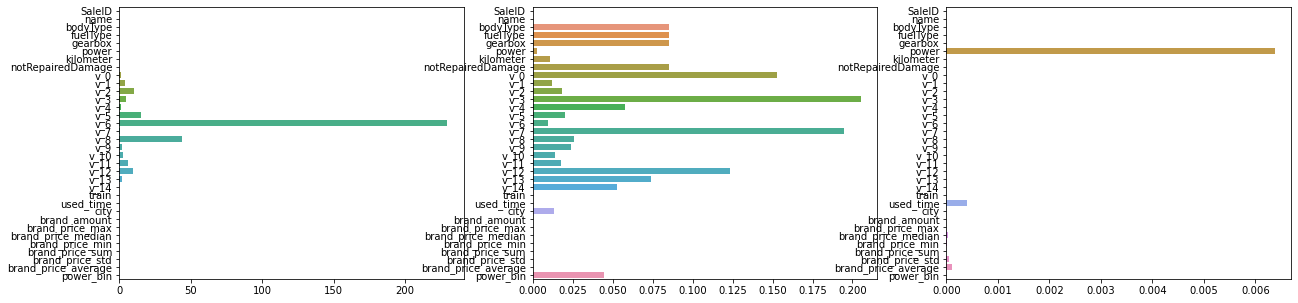

In [38]:
# 对三个模型的变量权重进行比较
model = LinearRegression().fit(train_X, train_y_ln)
print('intercept:'+ str(model.intercept_))
plt.figure(figsize=(21,5))
plt.subplot(1,3,1)
sns.barplot(abs(model.coef_), continuous_feature_names)
model = Ridge().fit(train_X, train_y_ln)
print('intercept:'+ str(model.intercept_))
plt.subplot(1,3,2)
sns.barplot(abs(model.coef_), continuous_feature_names)
model = Lasso().fit(train_X, train_y_ln)
print('intercept:'+ str(model.intercept_))
plt.subplot(1,3,3)
sns.barplot(abs(model.coef_), continuous_feature_names)


In [41]:
from xgboost.sklearn import XGBRegressor
# 构建 XGboost 模型
model = XGBRegressor(n_estimators = 100, objective='reg:squarederror')
model = model.fit(train_X, train_y)
# 对未对标签进行处理的数据进行交叉验证，得到每一折的模型评价得分(绝对误差均值)，以及得分均值AVG1
scores = cross_val_score(model, X = train_X, y = train_y, verbose = 1, cv = 5, scoring =
make_scorer(log_transfer(mean_absolute_error)))
print('AVG1:', np.mean(scores))
score_out1 = pd.DataFrame(scores.reshape(1,-1))
#score_out.columns = ['cv' + str(x) for x in range(1, 6)]
# 对已经对标签进行处理的数据进行交叉验证，得到每一折的模型评价得分(绝对误差均值)，以及得分均值AVG2
scores = cross_val_score(model, X = train_X, y = train_y_ln, verbose = 1, cv = 5, scoring =
make_scorer(mean_absolute_error))
print('AVG2:', np.mean(scores))
score_out2 = pd.DataFrame(scores.reshape(1,-1))
score_out = pd.concat([score_out1 , score_out2])
score_out.columns = ['cv' + str(x) for x in range(1, 6)]
score_out.index = ['MAE_raw','MAE_after log']
score_out


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   5 out of   5 | elapsed:    1.4s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.


AVG1: 0.1072556272149086
AVG2: 0.0923495888710022


[Parallel(n_jobs=1)]: Done   5 out of   5 | elapsed:    1.3s finished


,cv1,cv2,cv3,cv4,cv5
MAE_raw,0.121374,0.104012,0.101788,0.112352,0.096752
MAE_after log,0.100694,0.097393,0.095941,0.089159,0.078561


In [ ]:
#最佳迭代次数

In [55]:
import xgboost as xgb
def modelfit(train_X, train_y, param, other_params):
    model = xgb.XGBRegressor(**other_params)
    optimized_GBM = GridSearchCV(estimator=model, param_grid=cv_params, scoring = "neg_mean_absolute_error",cv=5, verbose=1, n_jobs=4)
    optimized_GBM.fit(train_X, train_y)
    evalute_result = optimized_GBM.cv_results_['mean_test_score']
    print('每轮迭代运行结果:{0}'.format(evalute_result))
    print('参数的最佳取值：{0}'.format(optimized_GBM.best_params_))
    print('最佳模型得分:{0}'.format(optimized_GBM.best_score_))

In [57]:
from sklearn.model_selection import GridSearchCV
cv_params = {'n_estimators': [100, 200, 300, 400, 500]}
other_params = {'learning_rate': 0.1, 'n_estimators': 100, 'max_depth': 5, 'min_child_weight': 1, 'seed': 0,'subsample': 1,
                'colsample_bytree': 0.8, 'gamma': 0, 'reg_alpha': 0, 'reg_lambda': 1}
modelfit(train_X, train_y, cv_params, other_params)

Fitting 5 folds for each of 5 candidates, totalling 25 fits
每轮迭代运行结果:[-599.72333984 -501.40888672 -461.44501953 -443.43585205 -433.42183838]
参数的最佳取值：{'n_estimators': 500}
最佳模型得分:-433.4218383789063


In [ ]:
#min_child_weight以及max_depth

In [58]:
cv_params = {'max_depth': [3, 4, 5, 6, 7, 8, 9, 10]}
other_params = {'learning_rate': 0.1, 'n_estimators': 500, 'max_depth': 5, 'min_child_weight': 1, 'seed': 0,
'subsample': 0.8, 'colsample_bytree': 0.8, 'gamma': 0, 'reg_alpha': 0, 'reg_lambda': 1}
modelfit(train_X, train_y, cv_params, other_params)


Fitting 5 folds for each of 8 candidates, totalling 40 fits
每轮迭代运行结果:[-534.09651489 -467.65067749 -424.88856812 -409.12705688 -403.79938965
 -409.58585815 -405.7434082  -406.34259644]
参数的最佳取值：{'max_depth': 7}
最佳模型得分:-403.7993896484375


In [68]:
cv_params = { 'min_child_weight': [1, 2, 3, 4, 5, 6]}
other_params= {'learning_rate': 0.1, 'n_estimators': 500, 'max_depth': 5, 'min_child_weight': 1, 'seed': 0,
'subsample': 0.8, 'colsample_bytree': 0.8, 'gamma': 0, 'reg_alpha': 0, 'reg_lambda': 1}
modelfit(train_X, train_y, cv_params, other_params)

Fitting 5 folds for each of 6 candidates, totalling 30 fits
每轮迭代运行结果:[-424.88856812 -413.99465942 -416.3723999  -433.01581421 -435.71110229
 -434.4956543 ]
参数的最佳取值：{'min_child_weight': 2}
最佳模型得分:-413.9946594238281


In [ ]:
#(3) gamma

In [59]:
cv_params = {'gamma': [0.1, 0.2, 0.3, 0.4, 0.5, 0.6]}
other_params = {'learning_rate': 0.1, 'n_estimators': 500, 'max_depth': 4, 'min_child_weight': 1, 'seed': 0,
'subsample': 0.8, 'colsample_bytree': 0.8, 'gamma': 0, 'reg_alpha': 0, 'reg_lambda': 1}
modelfit(train_X, train_y, cv_params, other_params)


Fitting 5 folds for each of 6 candidates, totalling 30 fits
每轮迭代运行结果:[-467.65067749 -467.65067749 -467.65067749 -467.65067749 -467.65067749
 -467.65067749]
参数的最佳取值：{'gamma': 0.1}
最佳模型得分:-467.6506774902344


In [ ]:
#(4) subsample以及colsample_bytree

In [60]:
cv_params = {'subsample': [0.6, 0.7, 0.8, 0.9]}
other_params = {'learning_rate': 0.1, 'n_estimators': 500, 'max_depth': 4, 'min_child_weight': 1, 'seed': 0,
'subsample': 0.8, 'colsample_bytree': 0.8, 'gamma': 0.1, 'reg_alpha': 0, 'reg_lambda': 1}
modelfit(train_X, train_y, cv_params, other_params)


Fitting 5 folds for each of 4 candidates, totalling 20 fits
每轮迭代运行结果:[-460.09227295 -450.56282959 -467.65067749 -453.92487793]
参数的最佳取值：{'subsample': 0.7}
最佳模型得分:-450.5628295898438


In [61]:
cv_params = {'colsample_bytree': [0.6, 0.7, 0.8, 0.9]}
other_params = {'learning_rate': 0.1, 'n_estimators': 500, 'max_depth': 4, 'min_child_weight': 1, 'seed': 0,
'subsample': 0.7, 'colsample_bytree': 0.8, 'gamma': 0.1, 'reg_alpha': 0, 'reg_lambda': 1}
modelfit(train_X, train_y, cv_params, other_params)


Fitting 5 folds for each of 4 candidates, totalling 20 fits
每轮迭代运行结果:[-453.59050293 -459.9979248  -450.56282959 -464.71477661]
参数的最佳取值：{'colsample_bytree': 0.8}
最佳模型得分:-450.5628295898438


In [ ]:
#(5) reg_alpha以及reg_lambda

In [62]:
cv_params = {'reg_alpha': [0.05, 0.1, 1, 2, 3]}
other_params = {'learning_rate': 0.1, 'n_estimators': 500, 'max_depth': 4, 'min_child_weight': 1, 'seed': 0,
'subsample': 0.7, 'colsample_bytree': 0.8, 'gamma': 0.1, 'reg_alpha': 0, 'reg_lambda': 1}
modelfit(train_X, train_y, cv_params, other_params)


Fitting 5 folds for each of 5 candidates, totalling 25 fits
每轮迭代运行结果:[-450.65929565 -451.31338501 -448.54099731 -447.40686035 -447.53431396]
参数的最佳取值：{'reg_alpha': 2}
最佳模型得分:-447.4068603515625


In [63]:
cv_params = {'reg_lambda': [0.05, 0.1, 1, 2, 3]}
other_params = {'learning_rate': 0.1, 'n_estimators': 500, 'max_depth': 4, 'min_child_weight': 1, 'seed': 0,
'subsample': 0.7, 'colsample_bytree': 0.8, 'gamma': 0.1, 'reg_alpha': 3, 'reg_lambda': 1}
modelfit(train_X, train_y, cv_params, other_params)


Fitting 5 folds for each of 5 candidates, totalling 25 fits
每轮迭代运行结果:[-458.12346191 -451.45732422 -447.53431396 -452.67374878 -459.11233521]
参数的最佳取值：{'reg_lambda': 1}
最佳模型得分:-447.53431396484376


In [ ]:
#(6) learning rate

In [64]:
cv_params = {'learning_rate': [0.01, 0.05, 0.07, 0.1, 0.2]}
other_params = {'learning_rate': 0.1, 'n_estimators': 500, 'max_depth': 4, 'min_child_weight': 1, 'seed': 0,
'subsample': 0.7, 'colsample_bytree': 0.7, 'gamma': 0.1, 'reg_alpha': 3, 'reg_lambda': 1}
modelfit(train_X, train_y, cv_params, other_params)

Fitting 5 folds for each of 5 candidates, totalling 25 fits
每轮迭代运行结果:[-810.37127686 -522.85332031 -491.11504517 -463.49003296 -450.95294189]
参数的最佳取值：{'learning_rate': 0.2}
最佳模型得分:-450.95294189453125
